In [1]:
import pandas as pd

In [2]:
test = pd.read_csv(r"C:\Users\12240\Desktop\train.csv") 

In [3]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.drop(['PassengerId','Name','Ticket'],axis = 1) 
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 单变量数据探索

频数分析

In [6]:
#Survived
Survived_freq = test.Survived.value_counts()
print(Survived_freq)

0    549
1    342
Name: Survived, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False  

Survived频数

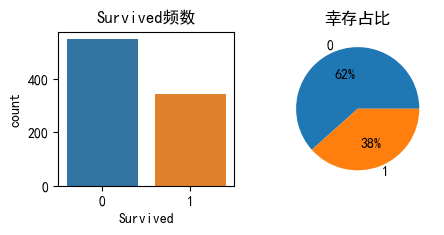

In [8]:
plt.figure(figsize = (5,2))
plt.subplot(1,2,1)
sns.countplot(x = 'Survived',data = test)
plt.title("Survived频数")
plt.subplot(1,2,2)
plt.pie(Survived_freq,labels = Survived_freq.index,autopct = "%1.0f%%")
plt.title("幸存占比")
plt.show()

Pclass频数

3    491
1    216
2    184
Name: Pclass, dtype: int64


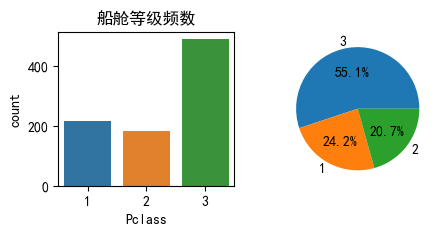

In [9]:
Pclass_freq = test['Pclass'].value_counts()
print(Pclass_freq)
plt.figure(figsize = (5,2))
plt.subplot(1,2,1)
sns.countplot(x = 'Pclass',data = test)
plt.title("船舱等级频数")
plt.subplot(1,2,2)
plt.pie(Pclass_freq,labels = Pclass_freq.index,autopct = "%0.1f%%")
plt.show()

In [10]:
def freq(a):
    freq = test[a].value_counts()
    print(freq)
    plt.figure(figsize(10,5))
    plt.subplot(1,2,1)
    sns.countplot(x = a,data = test)
    plt.title(a + "频数")
    plt.subplot(1,2,2)
    plt.pie(freq,labels = freq.index,autopct = "%1.0f%%")
    plt.title(a + "占比")
    plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


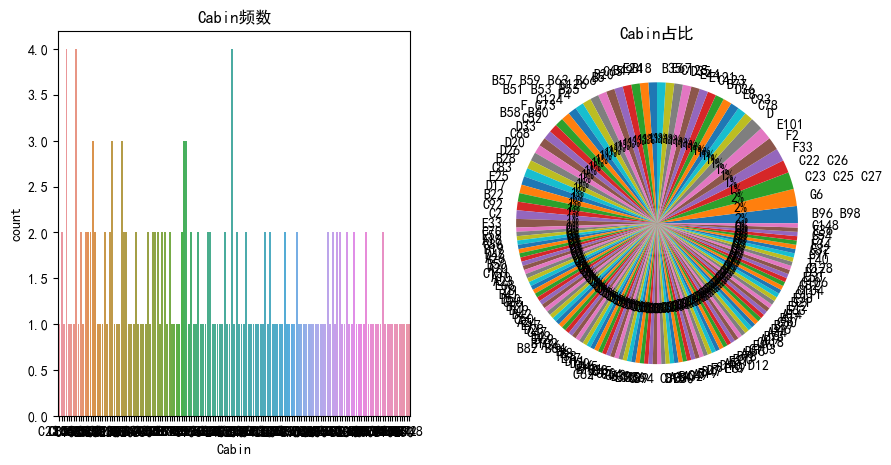

In [11]:
%pylab inline
freq('Cabin')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


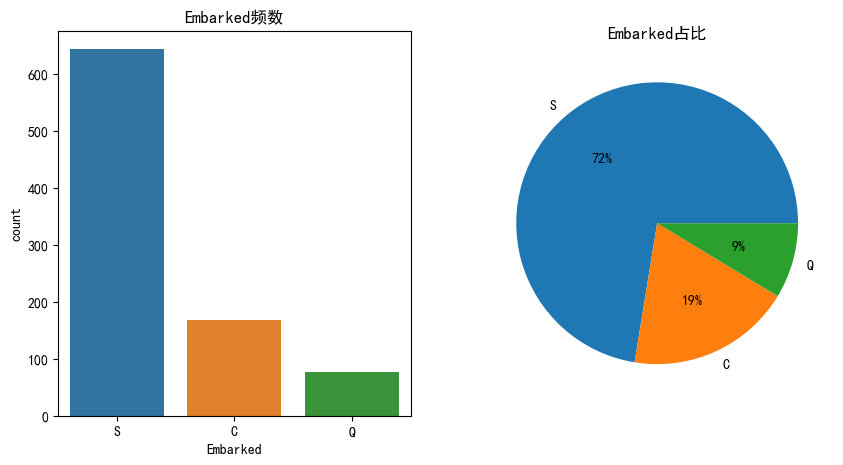

In [12]:
test = test.drop('Cabin',axis = 1)
freq('Embarked')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


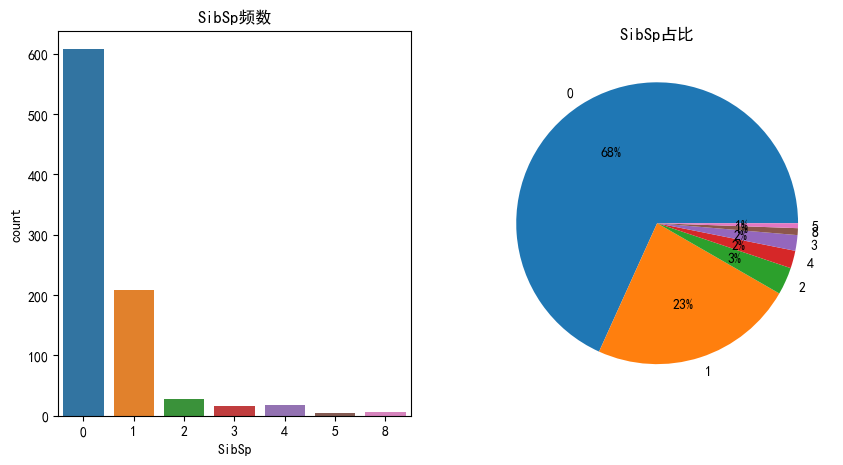

In [13]:
freq('SibSp')

male      577
female    314
Name: Sex, dtype: int64


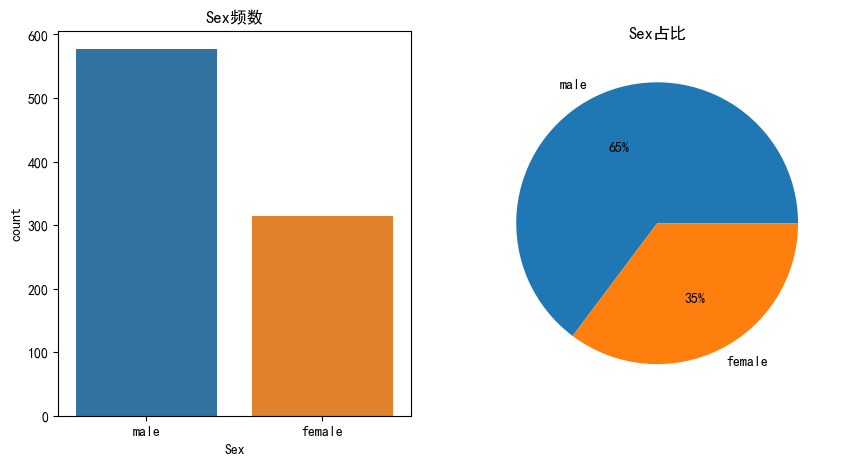

In [14]:
freq('Sex')

# 直方图频数分析

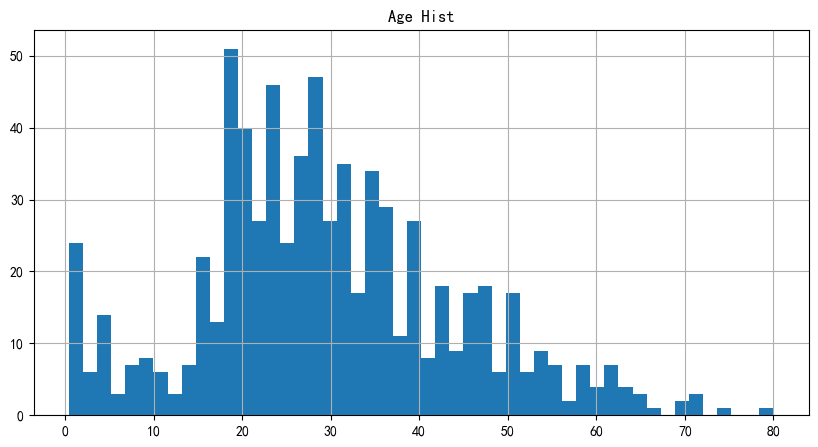

In [15]:
#Age
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
test['Age'].hist(bins = 50)
plt.title("Age Hist")
plt.show()

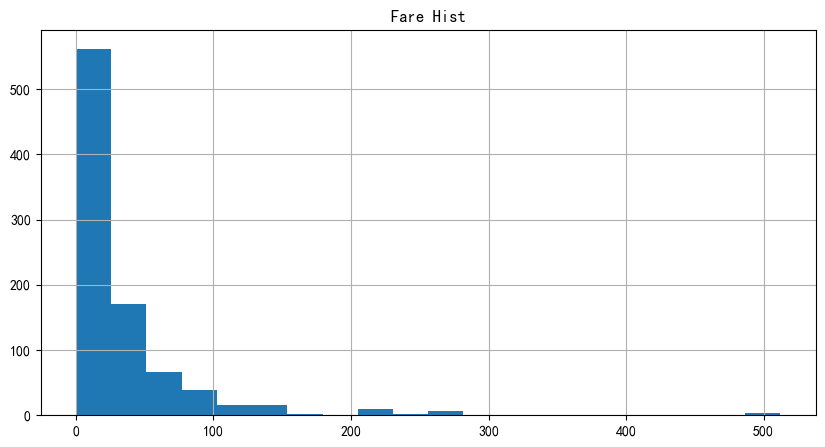

In [16]:
#Fare
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
test['Fare'].hist(bins = 20)
plt.title("Fare Hist")
plt.show()

# 描述性统计

In [17]:
test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
test.quantile([0.1,0.2,0.3,0.5,1]) #自定义分位数

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0.1,90.0,0.0,1.0,14.0,0.0,0.0,7.5500
0.2,179.0,0.0,1.0,19.0,0.0,0.0,7.8542
0.3,268.0,0.0,2.0,22.0,0.0,0.0,8.0500
0.5,446.0,0.0,3.0,28.0,0.0,0.0,14.4542
1.0,891.0,1.0,3.0,80.0,8.0,6.0,512.3292


# 多变量数据探索

1.两个数值类型变量分析（用散点图）

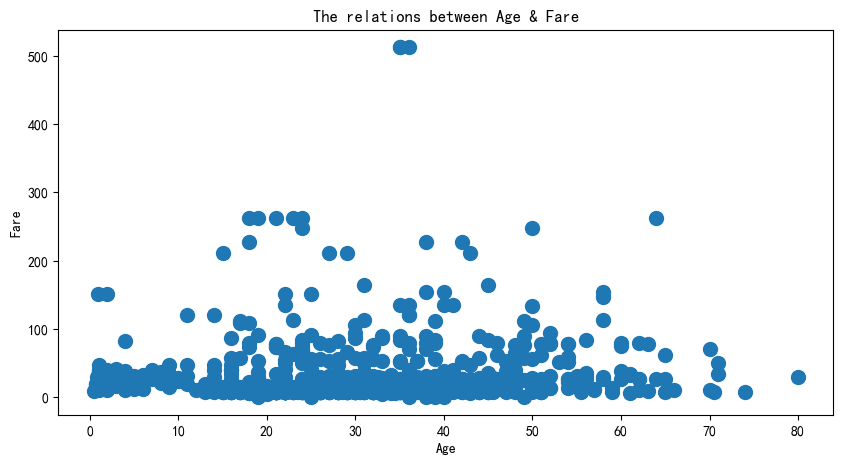

In [19]:
plt.figure(figsize = (10,5))
plt.scatter(test['Age'],test['Fare'],100)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("The relations between Age & Fare")
plt.show()

2.两个类别类型变量分析（交叉表、Stack条图）

In [20]:
pd.crosstab(test['Survived'],test['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [21]:
pd.crosstab(test['Survived'],test['Sex'],margins = True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [22]:
datasp = pd.crosstab(test['Survived'],test['Pclass'])
datasp

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


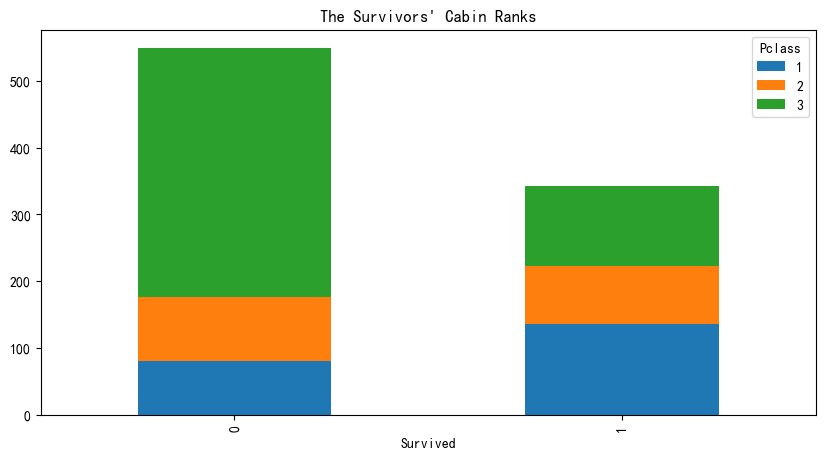

In [23]:
datasp.plot(kind = 'bar',stacked = True)
plt.title("The Survivors' Cabin Ranks")
plt.show()

In [24]:
datasp = pd.crosstab(test['Survived'],test['Sex'])
datasp

Sex,female,male
Survived,,
0,81,468
1,233,109


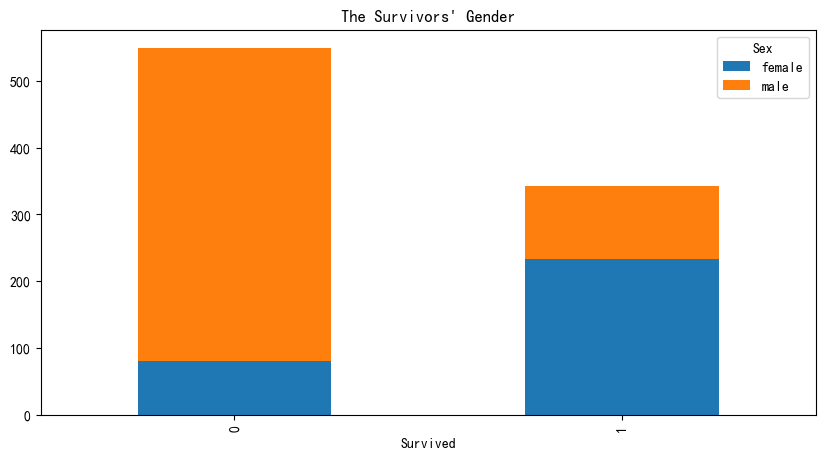

In [25]:
datasp.plot(kind = 'bar',stacked = True)
plt.title("The Survivors' Gender")
plt.show()

In [26]:
datasp = pd.crosstab(test['Survived'],test['Embarked'])
datasp

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


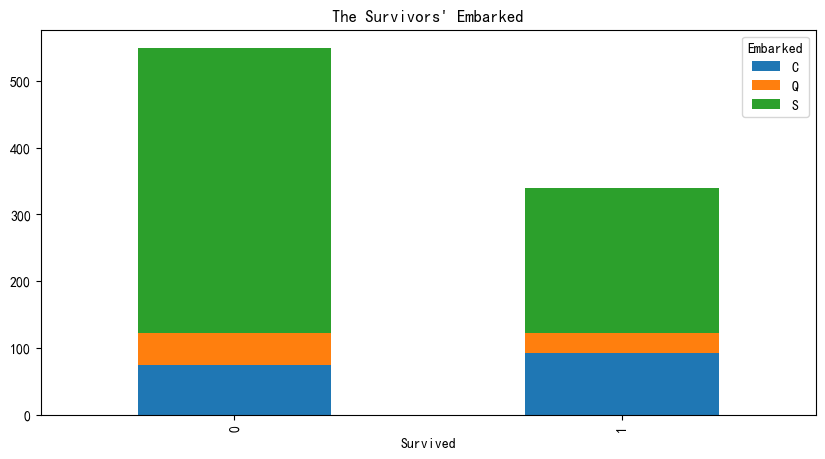

In [27]:
datasp.plot(kind = 'bar',stacked = True)
plt.title("The Survivors' Embarked")
plt.show()

3.类别型变量和数值型变量（groupby）

In [28]:
datasaf = test.groupby('Survived').agg({"Age":"mean","Fare":"mean"})
datasaf

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


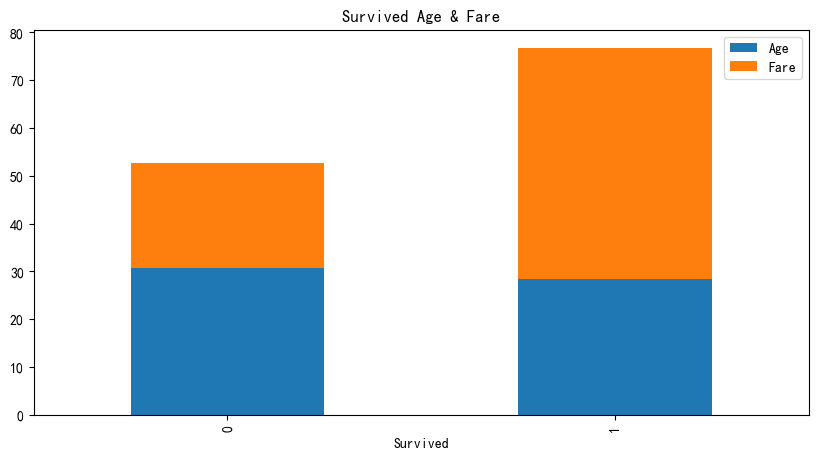

In [29]:
datasaf.plot(kind = "bar",stacked = True)
plt.title("Survived Age & Fare")
plt.show()

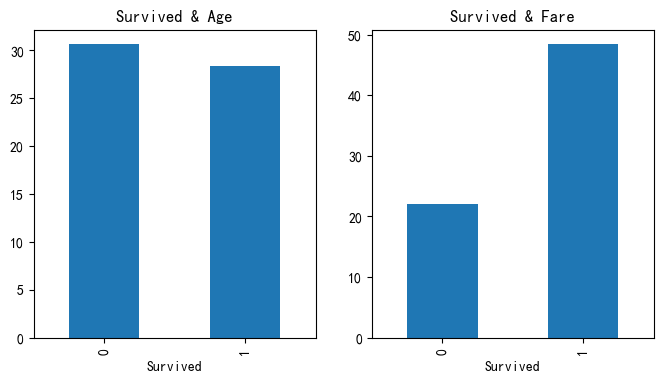

In [30]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
datasaf["Age"].plot(kind = "bar")
plt.title("Survived & Age")
plt.subplot(1,2,2)
datasaf['Fare'].plot(kind = "bar")
plt.title("Survived & Fare")
plt.show()

# 数据预处理

1.缺失值处理

In [31]:
dropna = test.dropna()
dropna

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [32]:
dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [33]:
test['Age_isna'] = 0
test.loc[test['Age'].isnull(),'Age_isna']=1
test.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0


In [34]:
test['Age_isna'].value_counts()

0    714
1    177
Name: Age_isna, dtype: int64

In [35]:
test['Age'].mean()

29.69911764705882

In [36]:
round(test['Age'].mean())

30

In [37]:
age_mean = round(test['Age'].mean())
test['Age'].fillna(age_mean,inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Age_isna     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [38]:
test['Embarked'].fillna('S',inplace = True)

2. 独热编码(ONEHOT ENCODING)

In [39]:
pd.get_dummies(test['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [40]:
pd.get_dummies(test['Pclass'],prefix = 'Pclass')

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [41]:
Pclass_onehot = pd.get_dummies(test['Pclass'],prefix = 'Pclass')
Pclass_onehot

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [42]:
Sex_onehot = pd.get_dummies(test['Sex'],prefix = 'Sex')
Sex_onehot

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [43]:
SibSp_onehot=pd.get_dummies(test['SibSp'],prefix="SibSp") 
SibSp_onehot

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0
887,1,0,0,0,0,0,0
888,0,1,0,0,0,0,0
889,1,0,0,0,0,0,0


# 3.分箱

自定义分箱pandas.cut()

In [44]:
bins=[0,18,25,40,60,100]
pd.cut(test['Age'],bins=bins).value_counts()

(25, 40]     440
(18, 25]     162
(0, 18]      139
(40, 60]     128
(60, 100]     22
Name: Age, dtype: int64

In [45]:
bins=[0,18,25,40,60,100]
test['Age_bin']=pd.cut(test['Age'],bins=bins)

In [46]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,"(18, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,"(25, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,"(25, 40]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,"(25, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,"(25, 40]"


等宽分箱

In [47]:
pd.cut(test.Age,10).value_counts()

(24.294, 32.252]    346
(16.336, 24.294]    177
(32.252, 40.21]     118
(40.21, 48.168]      70
(0.34, 8.378]        54
(8.378, 16.336]      46
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age, dtype: int64

In [48]:
test['Age_wbin']=pd.cut(test.Age,5)

等深分箱 pandas.qcut()

In [49]:
pd.qcut(test.Age,5).value_counts()

(28.0, 30.0]     224
(20.0, 28.0]     183
(0.419, 20.0]    179
(38.0, 80.0]     177
(30.0, 38.0]     128
Name: Age, dtype: int64

In [50]:
test['Age_bin']=pd.qcut(test.Age,5)

In [51]:
test['Fare_bin']=pd.qcut(test.Fare,5)

自定义分箱独热编码

In [52]:
pd.get_dummies(test['Age_bin'],prefix='Age_bin')

,"Age_bin_(0.419, 20.0]","Age_bin_(20.0, 28.0]","Age_bin_(28.0, 30.0]","Age_bin_(30.0, 38.0]","Age_bin_(38.0, 80.0]"
0,0,1,0,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
886,0,1,0,0,0
887,1,0,0,0,0
888,0,0,1,0,0
889,0,1,0,0,0


In [53]:
Age_bin_onehot=pd.get_dummies(test['Age_bin'],prefix='Age_bin')
Age_bin_onehot

,"Age_bin_(0.419, 20.0]","Age_bin_(20.0, 28.0]","Age_bin_(28.0, 30.0]","Age_bin_(30.0, 38.0]","Age_bin_(38.0, 80.0]"
0,0,1,0,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
886,0,1,0,0,0
887,1,0,0,0,0
888,0,0,1,0,0
889,0,1,0,0,0


# 4.标准化和归一化

# 5.构造新变量

运算构造

In [54]:
test['FamilySize']=test['SibSp']+test['Parch']+1

In [55]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna,Age_bin,Age_wbin,Fare_bin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,"(20.0, 28.0]","(16.336, 32.252]","(-0.001, 7.854]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,"(30.0, 38.0]","(32.252, 48.168]","(39.688, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,"(20.0, 28.0]","(16.336, 32.252]","(7.854, 10.5]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,"(30.0, 38.0]","(32.252, 48.168]","(39.688, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,"(30.0, 38.0]","(32.252, 48.168]","(7.854, 10.5]",1


逻辑构造

In [56]:
test['IsAlone']=0
test.loc[test['FamilySize']==1,'IsAlone']=1

In [57]:
test['IsMother']=0
test.loc[(test['Parch']>0)&(test['Sex']=='female')&(test['Age']>=20),'IsMother']=1

拼接构造

In [58]:
test['Sex_Age']=test['Sex']+"_"+test['Age_bin'].astype(str)

In [59]:
test.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna,Age_bin,Age_wbin,Fare_bin,FamilySize,IsAlone,IsMother,Sex_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,"(20.0, 28.0]","(16.336, 32.252]","(-0.001, 7.854]",2,0,0,"male_(20.0, 28.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,"(30.0, 38.0]","(32.252, 48.168]","(39.688, 512.329]",2,0,0,"female_(30.0, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,"(20.0, 28.0]","(16.336, 32.252]","(7.854, 10.5]",1,1,0,"female_(20.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,"(30.0, 38.0]","(32.252, 48.168]","(39.688, 512.329]",2,0,0,"female_(30.0, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,"(30.0, 38.0]","(32.252, 48.168]","(7.854, 10.5]",1,1,0,"male_(30.0, 38.0]"
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q,1,"(28.0, 30.0]","(16.336, 32.252]","(7.854, 10.5]",1,1,0,"male_(28.0, 30.0]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,"(38.0, 80.0]","(48.168, 64.084]","(39.688, 512.329]",1,1,0,"male_(38.0, 80.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,"(0.419, 20.0]","(0.34, 16.336]","(10.5, 21.679]",5,0,0,"male_(0.419, 20.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,"(20.0, 28.0]","(16.336, 32.252]","(10.5, 21.679]",3,0,1,"female_(20.0, 28.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,"(0.419, 20.0]","(0.34, 16.336]","(21.679, 39.688]",2,0,0,"female_(0.419, 20.0]"


In [60]:
Pclass_onehot=pd.get_dummies(test['Pclass'],prefix="Pclass")
Sex_onehot=pd.get_dummies(test['Sex'],prefix="Sex")
Embarked_onehot=pd.get_dummies(test['Embarked'],prefix="Embarked")
Age_bin_onehot=pd.get_dummies(test['Age_bin'],prefix="Age_bin")
Fare_bin_onehot=pd.get_dummies(test['Fare_bin'],prefix="Fare_bin")
FamilySize_onehot=pd.get_dummies(test['FamilySize'],prefix="FamilySize")
Sex_Age_onehot=pd.get_dummies(test['Sex_Age'],prefix="Sex_Age")

In [61]:
TrainData=pd.concat([test[['Survived','Age_isna','IsAlone','IsMother']],
         Pclass_onehot,Sex_onehot,Embarked_onehot,Age_bin_onehot,Fare_bin_onehot,FamilySize_onehot,Sex_Age_onehot],axis=1)

In [62]:
test.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna,Age_bin,Age_wbin,Fare_bin,FamilySize,IsAlone,IsMother,Sex_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,"(20.0, 28.0]","(16.336, 32.252]","(-0.001, 7.854]",2,0,0,"male_(20.0, 28.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,"(30.0, 38.0]","(32.252, 48.168]","(39.688, 512.329]",2,0,0,"female_(30.0, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,"(20.0, 28.0]","(16.336, 32.252]","(7.854, 10.5]",1,1,0,"female_(20.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,"(30.0, 38.0]","(32.252, 48.168]","(39.688, 512.329]",2,0,0,"female_(30.0, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,"(30.0, 38.0]","(32.252, 48.168]","(7.854, 10.5]",1,1,0,"male_(30.0, 38.0]"
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q,1,"(28.0, 30.0]","(16.336, 32.252]","(7.854, 10.5]",1,1,0,"male_(28.0, 30.0]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,"(38.0, 80.0]","(48.168, 64.084]","(39.688, 512.329]",1,1,0,"male_(38.0, 80.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,"(0.419, 20.0]","(0.34, 16.336]","(10.5, 21.679]",5,0,0,"male_(0.419, 20.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,"(20.0, 28.0]","(16.336, 32.252]","(10.5, 21.679]",3,0,1,"female_(20.0, 28.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,"(0.419, 20.0]","(0.34, 16.336]","(21.679, 39.688]",2,0,0,"female_(0.419, 20.0]"


In [63]:
TrainData

,Survived,Age_isna,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,"Sex_Age_female_(0.419, 20.0]","Sex_Age_female_(20.0, 28.0]","Sex_Age_female_(28.0, 30.0]","Sex_Age_female_(30.0, 38.0]","Sex_Age_female_(38.0, 80.0]","Sex_Age_male_(0.419, 20.0]","Sex_Age_male_(20.0, 28.0]","Sex_Age_male_(28.0, 30.0]","Sex_Age_male_(30.0, 38.0]","Sex_Age_male_(38.0, 80.0]"
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
887,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
888,0,1,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
889,1,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [64]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 拆分目标变量和特征变量x和y 

In [65]:
TrainData_x = TrainData.drop('Survived',axis = 1)
TrainData_x

,Age_isna,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,"Sex_Age_female_(0.419, 20.0]","Sex_Age_female_(20.0, 28.0]","Sex_Age_female_(28.0, 30.0]","Sex_Age_female_(30.0, 38.0]","Sex_Age_female_(38.0, 80.0]","Sex_Age_male_(0.419, 20.0]","Sex_Age_male_(20.0, 28.0]","Sex_Age_male_(28.0, 30.0]","Sex_Age_male_(30.0, 38.0]","Sex_Age_male_(38.0, 80.0]"
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
887,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
888,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
889,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
TrainData_y = TrainData['Survived'] #[['Survived']]
TrainData_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 拆分训练集和测试集
得到四个值：xtrain ytrain xtest ytest

In [67]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(TrainData_x,TrainData_y,test_size = 0.2,random_state = 123456)

In [68]:
X_Train

,Age_isna,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,"Sex_Age_female_(0.419, 20.0]","Sex_Age_female_(20.0, 28.0]","Sex_Age_female_(28.0, 30.0]","Sex_Age_female_(30.0, 38.0]","Sex_Age_female_(38.0, 80.0]","Sex_Age_male_(0.419, 20.0]","Sex_Age_male_(20.0, 28.0]","Sex_Age_male_(28.0, 30.0]","Sex_Age_male_(30.0, 38.0]","Sex_Age_male_(38.0, 80.0]"
189,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
370,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
187,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
701,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
543,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,1,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
49,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
498,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
746,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
X_Test

,Age_isna,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,"Sex_Age_female_(0.419, 20.0]","Sex_Age_female_(20.0, 28.0]","Sex_Age_female_(28.0, 30.0]","Sex_Age_female_(30.0, 38.0]","Sex_Age_female_(38.0, 80.0]","Sex_Age_male_(0.419, 20.0]","Sex_Age_male_(20.0, 28.0]","Sex_Age_male_(28.0, 30.0]","Sex_Age_male_(30.0, 38.0]","Sex_Age_male_(38.0, 80.0]"
480,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
885,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
440,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
335,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
525,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
886,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
161,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
495,1,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
Y_Train

189    0
370    1
187    1
701    1
543    1
      ..
568    0
49     0
498    0
746    0
65     1
Name: Survived, Length: 712, dtype: int64

In [71]:
Y_Test

480    0
885    0
440    1
335    0
525    0
      ..
577    1
886    0
161    1
495    0
695    0
Name: Survived, Length: 179, dtype: int64

# 实例化模型(逻辑回归）

In [72]:
Ir = LogisticRegression()

In [73]:
Ir.fit(X_Train,Y_Train)

LogisticRegression()

In [74]:
y_test_pred = Ir.predict(X_Test)

In [75]:
print(classification_report(Y_Test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       108
           1       0.73      0.75      0.74        71

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [76]:
print(classification_report(Y_Test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       108
           1       0.73      0.75      0.74        71

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [77]:
#1.加载test训练数据集
test=pd.read_csv(r'C:\Users\12240\Desktop\test.csv')
# 2、删除无效的字段：PassngerId,Ticket,Name
# 如果对于测试集则需要将PassengerId保留，为了后续将预测结果与乘客的信息对应起来
# 如果对于训练集则需要将PassengerId删除
test=test.drop(['Name','Ticket','Cabin'],axis=1)
# 3、构造新的特征标记年龄缺失值
test['Age_isna']=0
test.loc[test['Age'].isnull(),'Age_isna']=1
# 4、平均值填充年龄缺失值
age_mean=round(test['Age'].mean())
test['Age'].fillna(age_mean,inplace=True)
# 5、处理登船港口(Embarked)缺失值,缺失值用"S"
test['Embarked'].fillna("S",inplace=True)
# 6、年龄数据分箱 --- 自定义分箱
bins=[0,18,25,40,60,100]
test['Age_bin']=pd.cut(test['Age'],bins=bins)
# 7、Fare船票价格进行分箱 --- 等深分箱
test['Fare_bin']=pd.qcut(test.Fare,5)
# 8、构造FamilySize特征
test['FamilySize']=test['SibSp']+test['Parch']+1
# 9、构造IsAlone特征
test['IsAlone']=0
test.loc[test['FamilySize']==1,'IsAlone']=1
# 10、构造IsMother特征
test['IsMother']=0
test.loc[(test['Parch']>0)&(test['Sex']=='female')&(test['Age']>=20),'IsMother']=1
# 11、Sex特征与Age_bin特征进行组合
test['Sex_Age']=test['Sex']+"_"+test['Age_bin'].astype(str)
# 12、对各种类别型特征进行独热编码
Pclass_onehot=pd.get_dummies(test['Pclass'],prefix="Pclass")
Sex_onehot=pd.get_dummies(test['Sex'],prefix="Sex")
Embarked_onehot=pd.get_dummies(test['Embarked'],prefix="Embarked")
Age_bin_onehot=pd.get_dummies(test['Age_bin'],prefix="Age_bin")
Fare_bin_onehot=pd.get_dummies(test['Fare_bin'],prefix="Fare_bin")
FamilySize_onehot=pd.get_dummies(test['FamilySize'],prefix="FamilySize")
Sex_Age_onehot=pd.get_dummies(test['Sex_Age'],prefix="Sex_Age")
# 类别型特征变量：Pclass、Sex、Embarked、AgeBin、FareBin、FamilySize、SexAge
# 13、把需要使用的特征变量拼接在一起
TestData=pd.concat([test[['PassengerId','Age_isna','IsAlone','IsMother']],
         Pclass_onehot,Sex_onehot,Embarked_onehot,Age_bin_onehot,Fare_bin_onehot,FamilySize_onehot,Sex_Age_onehot],axis=1)
# 原始数据集需要保留的特征：Survived、AgeIsMissing、IsAlone、IsMother

In [78]:
TestData

,PassengerId,Age_isna,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,"Sex_Age_female_(0, 18]","Sex_Age_female_(18, 25]","Sex_Age_female_(25, 40]","Sex_Age_female_(40, 60]","Sex_Age_female_(60, 100]","Sex_Age_male_(0, 18]","Sex_Age_male_(18, 25]","Sex_Age_male_(25, 40]","Sex_Age_male_(40, 60]","Sex_Age_male_(60, 100]"
0,892,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,893,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,894,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,895,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,896,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
414,1306,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
415,1307,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
416,1308,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
X=TestData.drop(['PassengerId'],axis=1)
PassengerId=TestData['PassengerId']

In [80]:
lr.predict(X)

NameError: name 'lr' is not defined

In [ ]:
lr.predict_proba(X)

特征相关系数

In [ ]:
# 将回归系数和特征名称组合在一起
# 把变量名称和系数对应起来组合成dataframe
import numpy as np
df_coef = pd.DataFrame(list(zip(x_train.columns, np.transpose(lr.coef_))),
                    columns=['columns', 'coef'])

# 将df_coef按照coef列进行降序排列
df_coef.sort_values(by="coef",ascending=False)